## 경사 하강법(Gradient Descent)
- 정의 : 손실의 줄이는 알고리즘으로 기울기가 최소가 되는 점을 찾아 알맞은 가증치를 찾는 것.
- 손실 함수를 최적화하는 방법 중 하나

### 점진적인 학습 또는 온라인 학습
- 확률적 경사하강법 (대표적)
- 훈련데이터가 한 번에 전달되는 것이 아니라 조금씩 전달 됨.
 - 늘어나는 모든 데이터를 수용하여 교육을 시킬 수 없기 때문에, 훈련데이터를 버릴까 고민했지만, 중요한 값이 있을수 있기 때문에 조금씩 훈련을 시키는 것이 된것.

## 확률적 경사 하강법(SGD)
- 훈련세트를 이용하여 손실을 최소화하는 곳으로 이동하는 것을 말하며 신경말알고리즘(딥러닝)에서 주로
 - 확률적: random으로 무작위
 - 경사: 기울기
 - 하강법: 내려가는 방법
- 손실을 최소화하는 곳으로 내려가는 방법(경사가 높은 곳을 조금씩천천히 내려오는게 가장 빠른 하강법)
- 가장 가파른 곳은 어떻게 찾을까? 확률적으로 찾음.
- 샘플을(미니배치) 찾아서 스텝 사이즈(배치 사이즈)
- 미니 배치 경사 하강법 : 배치사이즈를 찾아서 조금씩 내려가는 법(한개는 너무하니 여러개를 찾아서 내려오는거)
- 에포크, 배치사이즈, 손실함수랑 비용함수(훈련셋 전체의 손실을 나타낸)는 다른 함수임

## 확률적 경사하강법을 활용한 분류 모델
- 오차행렬(혼돈행렬)
- 유방암 데이터셋 이용, 로지스틱회귀 후 xg부스트 까지... 

### 필수 라이브러리 로딩

In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [4]:
# 그래프 주피터 노트북에 표시, 폰트 더 선명하게
%matplotlib inline 
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='batang')

# Unicode 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

# 경고 무시
warnings.filterwarnings('ignore')

### 훈련 데이터 로딩

In [7]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [14]:
# target 고유값 추출
fish['Species'].unique()  # 다중 분류를 해야겠군

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [9]:
# Species(타깃 데이터)를 제외한 나머지 특성은 입력 데이터로 사용.
fish_input = fish.drop('Species', axis=1).to_numpy()
fish_target = fish['Species'].to_numpy()

### 특성 전처리와 훈련세트, 테스트 세트 분리
- 정규화(값이 0~1의 수로 값이 너무 클때(minmax)) , 표준화(값의 범위가 평균은 0 표준편차가 1). 해야할 떄, 
- 스케일링은 모델을 학습시키기 전에만 하면 된다.(즉, 셋 분리 전 또는 분리 후 모두 가능)

In [11]:
from sklearn.model_selection import train_test_split # 세트 분리
from sklearn.preprocessing import StandardScaler # 스케일링

# 세트 분리
X_train, X_test, y_train, y_test = train_test_split(
fish_input, fish_target, random_state=42)

# 표준화
ss = StandardScaler()
ss.fit(X_train) # 비지도 학습
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

### 모델 훈련_확률적 경사 하강법

In [16]:
# SGDClassifier 클래스 : 확률적 경사 하강법을 제공하는 분류용 클래스
from sklearn.linear_model import SGDClassifier
## 매개변수가 하이퍼파라미터로 사용 주로 손실함수랑 에포크(전체 훈련데이터 샘플을 사용하는 횟수)

# loss function(손실함수) : 손실함수의 종류를 지정하는 매개변수(loss)
## 이진분류회귀(이진크로스엔트로피), 다중분류회귀(크로스엔트로피, 소프트맥스)
# max_iter : 수행할 에포크 횟수
sc =SGDClassifier(loss='log', max_iter=10, random_state=42) # 손실로 로짓함수사용

# 학습
sc.fit(train_scaled, y_train)

# 평가
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.773109243697479
0.775


In [17]:
# 에포크 값이 적어서 정확성이 떨어지나? 그럼 병렬학습을 해보자
# 모델을 이어서 훈련할 떄(병렬학습) partial_fit()
sc.partial_fit(train_scaled, y_train)

print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))
# 그럼 한번더 에포크를 더하면 더 늘어? 과대적합을 유발하진 않을까?
# 그렇다면 가장 적절한 에포크의 횟수는 ?

0.8151260504201681
0.85


### 가장 적절한 에포크 횟수찾기
- 에포크 횟수가 적어 모델이 훈련세트를 덜 학습하게되면 과소적합이 발생.
- 너무 많은 에포크 횟수는 과대적합된 모델일 가능성이 높다.

In [19]:
# partial_fit()를 사용하여 적절한 에포크 수 찾기
sc = SGDClassifier(loss='log', random_state=42)

# 학습 결과를 리스트에 담기
train_score = [] # 빈리스트 생성
test_score = []

## partial_fit()만 사용하려면 훈련 세트의 전체 (타겟)클래스의 레이블을 전달해줘야 한다.
classes = np.unique(y_train)

## 총 300번의 에포크 동안 훈련을 반복하여 진행
for _ in range(0,300):
    sc.partial_fit(train_scaled, y_train, classes = classes)
    train_score.append(sc.score(train_scaled, y_train))
    test_score.append(sc.score(test_scaled, y_test))


### 에포크 횟수에 따른 점수 시각화 작업
- 시각화를 통해 에포크 횟수가 몇일때 가장 좋은지 확인

In [20]:
# 차트 스타일 지정
sns.set(font='batang', rc={'axes.unicode_minus':False}, style ='darkgrid')
plt.rc('figure', figsize=(10,8)) # 사이즈 지정

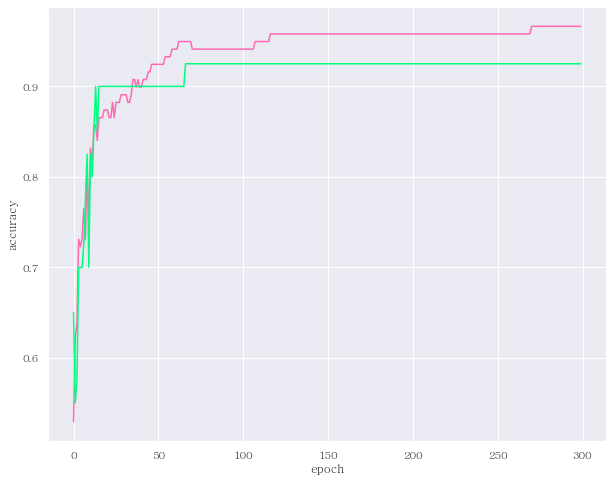

In [21]:
plt.plot(train_score, color = 'hotpink')
plt.plot(test_score, color = 'springgreen')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [22]:
# 조기종료 가능 : 일정 에포크동안 성능이 향상되지 않으면 더이상 훈련하지 않고 종료
# tol매개변수 : 향상될 최소값을 지정하는 옵션값을 none으로 설정하면 자동으로 멈추지않고 max_iter만큼
# 서포트 벡터 머신(SVM) 알고리즘에서 사용되는 손실함수의 기본값은 hinge
# 최적의 에포크 횟수는 100
bsc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
bsc.fit(train_scaled, y_train)

# 평가
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.9663865546218487
0.925


In [ ]:
# 그렇다고 에포크 값을 너무 상승시키면 과대적합 발생